In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
### YOUR CODE HERE
# Figure out how to import regularizers
###
from tensorflow.keras import regularizers

In [3]:
#!wget --no-check-certificate \
#    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
#    -O /tmp/sonnets/sonnets.txt

In [4]:
tokenizer = Tokenizer()

data = open('/tmp/sonnets/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [7]:
total_words

3211

In [11]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 64)            205504    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 300)           258000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              103424    
_________________________________________________________________
dense_3 (Dense)              (None, 3211)              3291275   
Total params: 4,018,603
Trainable params: 4,018,603
Non-trainable params: 0
____________________________________________

In [12]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 4s 9ms/step - loss: 6.9359 - accuracy: 0.0206
Epoch 2/100
484/484 [==============================] - 4s 9ms/step - loss: 6.5053 - accuracy: 0.0211
Epoch 3/100
484/484 [==============================] - 4s 9ms/step - loss: 6.4328 - accuracy: 0.0244
Epoch 4/100
484/484 [==============================] - 4s 9ms/step - loss: 6.3451 - accuracy: 0.0273
Epoch 5/100
484/484 [==============================] - 4s 9ms/step - loss: 6.2466 - accuracy: 0.0318
Epoch 6/100
484/484 [==============================] - 4s 9ms/step - loss: 6.1785 - accuracy: 0.0354
Epoch 7/100
484/484 [==============================] - 4s 9ms/step - loss: 6.1123 - accuracy: 0.0374
Epoch 8/100
484/484 [==============================] - 4s 9ms/step - loss: 6.0423 - accuracy: 0.0400
Epoch 9/100
484/484 [==============================] - 4s 9ms/step - loss: 5.9736 - accuracy: 0.0424
Epoch 10/100
484/484 [==============================] - 4s 9ms/step - loss: 5.9000 - accura

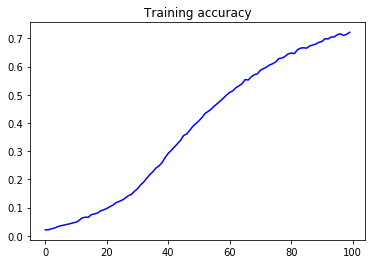

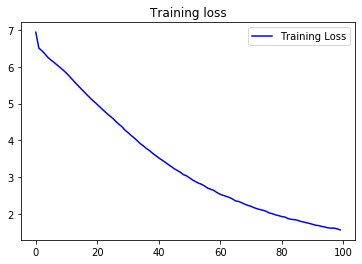

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [15]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi Wan Kenobi, you're my only hope a poet's can spent taken some place me more will none write with thee so know you young bright prove thee thine eye seen his gain were live true mine all thee that thee of me my love's might end rare rare substantial mother ill face might rare 'will ' or thee yet die truth will see me it look hence thy heart or their rhyme skill might bear thee fair strife store good store dyed might 'tis true grew both ill delight away so end still chary twain bevel alone had thee say it days thee good long had
